<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importar-las-librerías" data-toc-modified-id="Importar-las-librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importar las librerías</a></span></li><li><span><a href="#Importar-los-datos" data-toc-modified-id="Importar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importar los datos</a></span></li><li><span><a href="#Limpieza-de-datos" data-toc-modified-id="Limpieza-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Limpieza de datos</a></span><ul class="toc-item"><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Análisis-estadístico" data-toc-modified-id="Análisis-estadístico-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Análisis estadístico</a></span></li><li><span><a href="#Datos-de-entrenamiento-y-de-testeo" data-toc-modified-id="Datos-de-entrenamiento-y-de-testeo-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Datos de entrenamiento y de testeo</a></span><ul class="toc-item"><li><span><a href="#Primer-test:-sin-normalizar-y-con-Random-UnderSample" data-toc-modified-id="Primer-test:-sin-normalizar-y-con-Random-UnderSample-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Primer test: sin normalizar y con Random UnderSample</a></span></li><li><span><a href="#Segundo-test:-sin-normalizar-y-con-SMOTE" data-toc-modified-id="Segundo-test:-sin-normalizar-y-con-SMOTE-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Segundo test: sin normalizar y con SMOTE</a></span></li><li><span><a href="#Tercer-test:-con-normalización-y-undersampling" data-toc-modified-id="Tercer-test:-con-normalización-y-undersampling-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Tercer test: con normalización y undersampling</a></span></li></ul></li></ul></li><li><span><a href="#Otros-modelos" data-toc-modified-id="Otros-modelos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Otros modelos</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Decision Tree</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Importar las librerías

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

## Importar los datos

In [2]:
# Cargamos los datos desde Github

df_red = pd.read_csv('https://raw.githubusercontent.com/M315/data_sience_EAE/master/3-3/data/winequality-red.csv?token=GHSAT0AAAAAABSP4J5IHN7Y2ROBKDVBKVA2YSJW2YQ', sep = ';', header = 0)
df_white = pd.read_csv('https://raw.githubusercontent.com/M315/data_sience_EAE/master/3-3/data/winequality-white.csv?token=GHSAT0AAAAAABSP4J5I2RMNQJS4VEPJA5OEYSJW3ZA', sep = ';', header = 0)

In [3]:
# Verificamos que se han subido bien

df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Limpieza de datos

### Análisis exploratorio

In [4]:
# Para ver toda la información de los datos en conjunto y ahorrar código, definimos una función:

def show_df(df):
    print("Data Frame:\n\n", df.head())
    print("\nShape: ",df.shape)
    print("\nNulls:\n", df.isnull().values.sum())
    print("\nDuplicados:\n", df.duplicated().values.sum())
    print("\nTypes:")
    for column in df:
        print("\t", '{:<20}'.format(column), '{:>8}'.format(str(df[column].dtype)))

In [5]:
# Y aplicamos la función al dataset de vino rosado y de vino blanco:

show_df(df_red)
show_df(df_white)

Data Frame:

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

La función anterior nos permite ver que:

* Tenemos datos desbalanceados: vino blanco = 4898 registros / vino rosado = 1599 registros. Cuando juntemos ambos datasets para elaborar el modelo clasificatorio, deberemos balancear las muestras. 
* No hay valores nulos en ninguno de los datasets.
* Sí hay valores duplicados: hemos de analizarlos y decidir si los eliminamos. 
* Ambos datasets tienen las mismas columnas.
* Vemos que todas las categorías son de tipo real, menos calidad, que es un entero. Entendemos que la calidad se puntúa en una escala tipo likert o similar y que debe de ser una variable subjetiva, mientras que las demás son variables objetivas; veremos qué rango de valores tiene.

In [6]:
# Empezamos por ver los duplicados del datast de vino rosado:

df_red[df_red.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [7]:
# Ahora vemos los duplicados del datast de vino blanco:

df_red[df_red.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [8]:
# Vemos que, efectivamente, son puramente duplicados. Los eliminamos en ambos datasets. 

df_white = df_white.drop_duplicates()
df_red = df_red.drop_duplicates()

In [9]:
# Verificamos que ya no tenemos duplicados:

print(df_red.duplicated().sum())
print(df_white.duplicated().sum())

0
0


In [10]:
# Vamos a ver en qué rango de valores se mueve la categoría "quality"

print(df_red['quality'].value_counts())
print(df_white['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


Por el momento, vemos que:
* Ya no tenemos datos duplicados
* Seguimos teniendo muestras desbalanceadas
* La columna quality, que es un entero, mientras todas las demás son reales, tiene valores en el rango 3 a 8 en el dataset de vino rosado, y en el rango de 3 a 9 en el dataset de vino blanco. Parece que cada valor se encuentra en una proporción similar en ambos datasets (excepto el 9), pero habremos de vigilar si, por el hecho de tener un valor más en el dataset de vino blanco, esta variable nos da problemas en nuestro modelo. 
* Por otra parte, es posible que la calidad de vino no sea una buena variable para predecir el tipo del mismo, puesto que no es una propiedad química del vino. Así, a no ser que uno de los dos tipos de vino sea más bueno que el otro por el hecho de ser de ese tipo (ej.: que el vino blanco sea siempre mejor que el rosado), es posible que la calidad sea una variable contaminadora para nuestro modelo. Lo verificaremos más adelante.

### Análisis estadístico

In [11]:
# El siguiente paso es mirar los estadísticos de nuestra muestra. 
# Especialmente importante será ver si tenemos outliers. Como en el paso anterior, definimos una función.

def estadisticas(df):
    print('{:<23}'.format('Column'), '{:<23}'.format('Mean'), '{:<23}'.format('Std'), '{:<10}'.format('Median'), '{:<10}'.format('Min'), '{:<10}'.format('Max'),'\n')
    for col in df:
        print('{:<23}'.format(col), '{:<23}'.format(df[col].mean()), '{:<23}'.format(df[col].std()), '{:<10}'.format(df[col].median()), '{:<10}'.format(df[col].min()), '{:<10}'.format(df[col].max()))

In [12]:
# Y la aplicamos primero al dataset de vino rosado:

estadisticas(df_red)

Column                  Mean                    Std                     Median     Min        Max        

fixed acidity           8.310596026490087       1.736989807532466       7.9        4.6        15.9      
volatile acidity        0.5294775570272258      0.18303131761907185     0.52       0.12       1.58      
citric acid             0.27233259749815975     0.1955365445504639      0.26       0.0        1.0       
residual sugar          2.523399558498897       1.3523137577104198      2.2        0.9        15.5      
chlorides               0.0881236203090504      0.04937686244348626     0.079      0.012      0.611     
free sulfur dioxide     15.893303899926417      10.447270259048695      14.0       1.0        72.0      
total sulfur dioxide    46.82597498160412       33.40894570661654       38.0       6.0        289.0     
density                 0.9967089477557026      0.0018689171325591398   0.9967     0.99007    1.00369   
pH                      3.309786607799856       0.155

* Vemos que hay columnas cuyos rango son mucho más elevados que otras: la mayoría tienen datos por debajo de 10, pero free sulfur llega hasta 72 y total sulfur hasta 289. Es probable que necesitemos normalizar los datos para que estas dos columnas no tengan un peso excesivo en la clasificación.
* Vemos que hay dos columnas en las desviación típica es casi tan grande como la media: en free sulfur dioxide y en total sulfur dioxide. Ello nos indica que son parámetros con una gran dispersión. 
* Vemos también que en estas dos columnas, la mediana se halla muy lejos de los valores máximos. 
* Sobre todo en el caso de total sulfur dioxide, vemos que, además, hay una diferencia importante entre la media y la mediana, lo que en conjunto con lo anterior, nos puede estar indicando que hay outliers que puedan distorsionar los datos. En cambio, en la variable de free sulfur dioxide, la media y la mediana se hallan próximas, lo cuál parece indicar que, pese a tener una importante dispersión, es posible que no hayan outliers importantes. 
* Así, para **analizar los outliers**, vamos a crear un boxplot para poder visualizarlo.

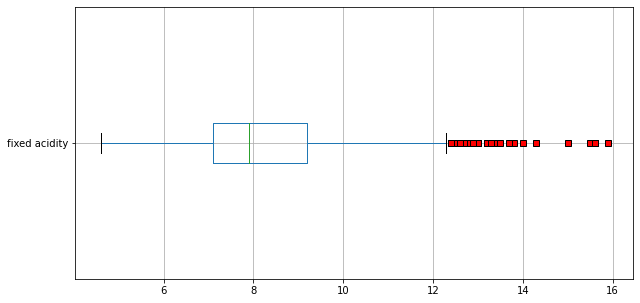

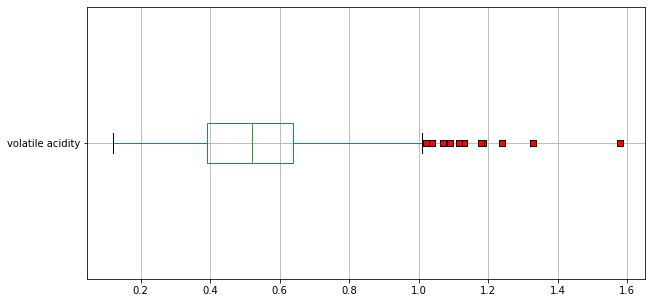

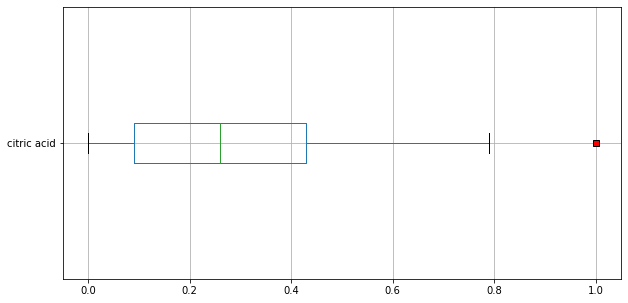

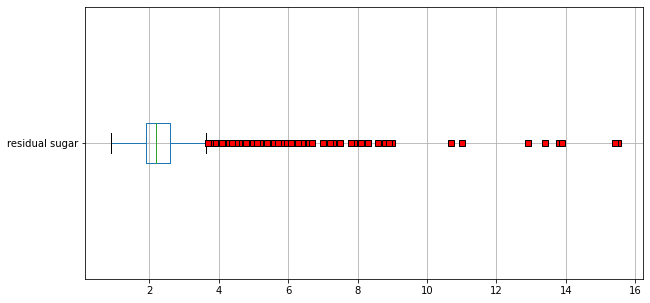

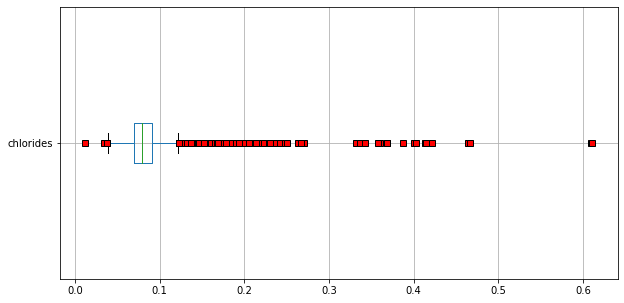

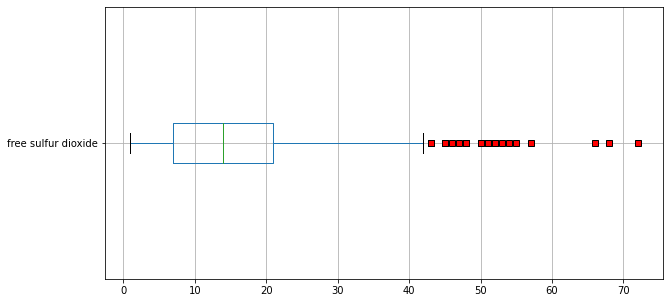

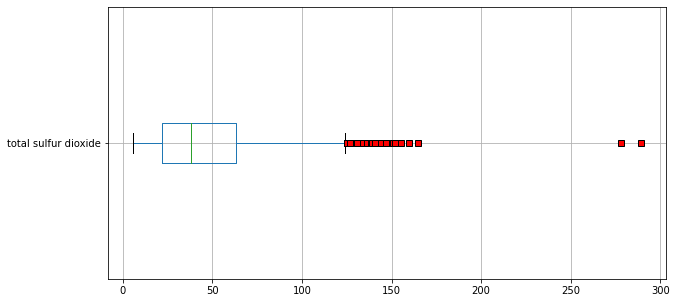

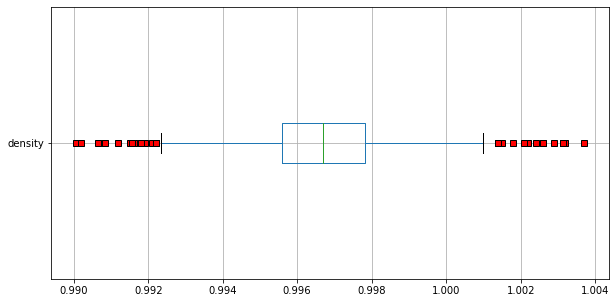

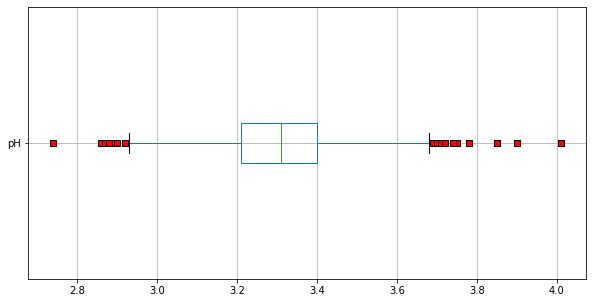

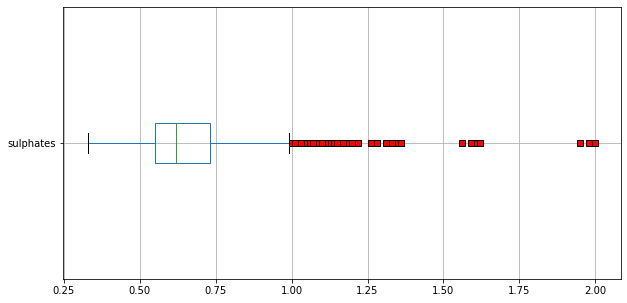

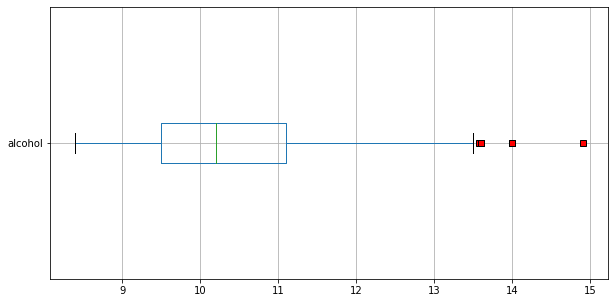

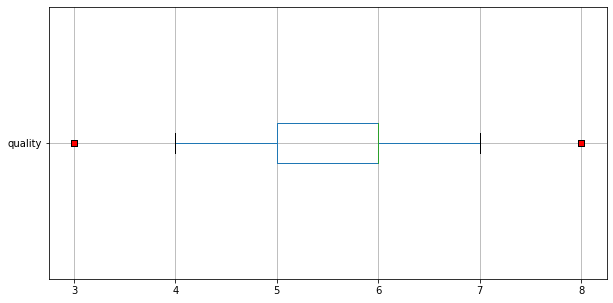

In [13]:
# Usamos matplotlib para visualizar los datos en box plot, y definimos un bucle para que itere por cada columna

for column in df_red:
    fig = plt.figure(figsize = (10,5))
    red_square = dict(markerfacecolor = 'r', marker = 's')
    df_red.boxplot([column], vert = False, flierprops = red_square)

* El mínimo y el máximo de cada caja señalan la posición (-3) y 3 desviaciones típicas. 
* Como vemos en el boxplot, casi todas las variables tienen datos a tres o más desviaciones típicas, no solamente las dos variables que a priori sospechábamos. 
* También hay variables con mucha más variabilidad que otras (por ejemplo, el citric acid tiene mucha variabilidad, comparado por ejemplo con los sulfatos). 
* Podemos considerar dichos datos outliers, y decidimos eliminarlos. 

In [1]:
# Definimos una función que crea un objeto con los datos situados por debajo de tres desviaciones típicas
# Usamos el modulo stats de Scipy

def clean_outliers(df):
    new = df.copy()
    for col in new:
        new = new[(np.abs(stats.zscore(new[col])) < 3)]
  
    return new

In [15]:
# La aplicamos al dataset de vino rosado, y verificamos que los estadísticos están más ajustados. 
# Vemos que hemos eliminado 151 registros que se situaban a +/-3 desviacones típicas de la media en alguna de las variables

df_red_cleaned = clean_outliers(df_red)
estadisticas(df_red_cleaned)

print('número de registros con outliers: ', df_red.shape)
print('número de resgistros sin outliers: ', df_red_cleaned.shape)

Column                  Mean                    Std                     Median     Min        Max        

fixed acidity           8.29205298013247        1.6484543006354677      7.9        5.0        13.5      
volatile acidity        0.5238534768211917      0.17239020271718672     0.52       0.12       1.07      
citric acid             0.2644205298013235      0.19132337791962487     0.25       0.0        0.79      
residual sugar          2.3739238410596033      0.8201246702332786      2.2        1.2        6.55      
chlorides               0.08153973509933744     0.02217233272844194     0.079      0.038      0.23      
free sulfur dioxide     14.984271523178808      9.168888588288198       13.0       1.0        45.0      
total sulfur dioxide    42.94619205298013       28.034974938234644      35.5       6.0        135.0     
density                 0.9966531208609278      0.001708772999893527    0.9966550000000001 0.9915     1.0018    
pH                      3.314966887417219    

In [16]:
# Hacemos el mismo proceso con el dataset de vino blanco. Empezando por ver los estadísticos:

estadisticas(df_white)

Column                  Mean                    Std                     Median     Min        Max        

fixed acidity           6.839346124715964       0.8668597405075802      6.8        3.8        14.2      
volatile acidity        0.2805377429941933      0.10343708697305004     0.26       0.08       1.1       
citric acid             0.33433223933349726     0.12244609076939166     0.32       0.0        1.66      
residual sugar          5.914819490027788       4.861646307806205       4.7        0.6        65.8      
chlorides               0.04590507447614268     0.02310271480397705     0.042      0.009      0.346     
free sulfur dioxide     34.889169401666244      17.21002061114961       33.0       2.0        289.0     
total sulfur dioxide    137.19351173945972      43.1290652402519        133.0      9.0        440.0     
density                 0.9937895304216049      0.0029045957783314807   0.9935     0.98711    1.03898   
pH                      3.195458217621807       0.151

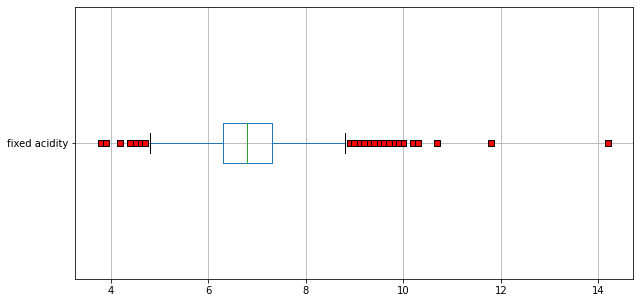

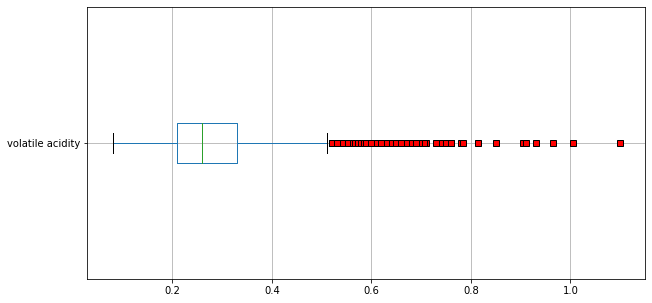

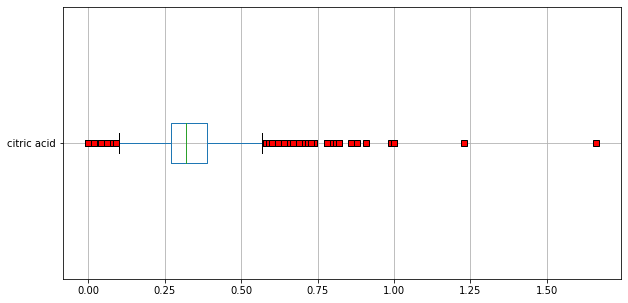

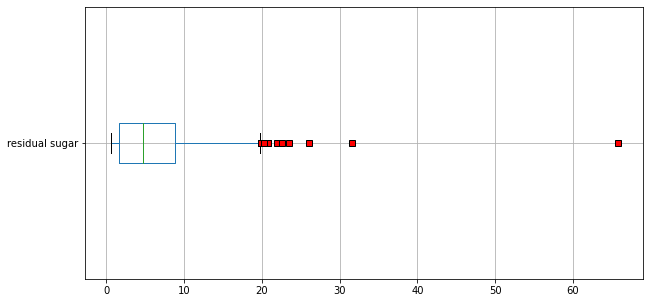

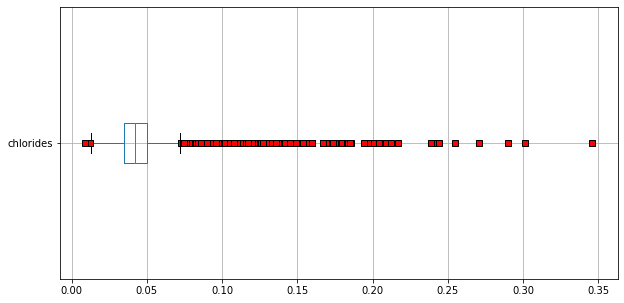

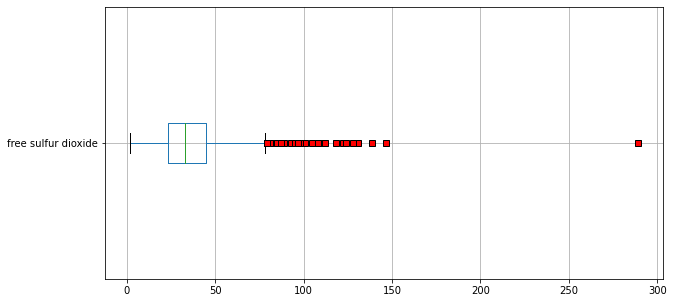

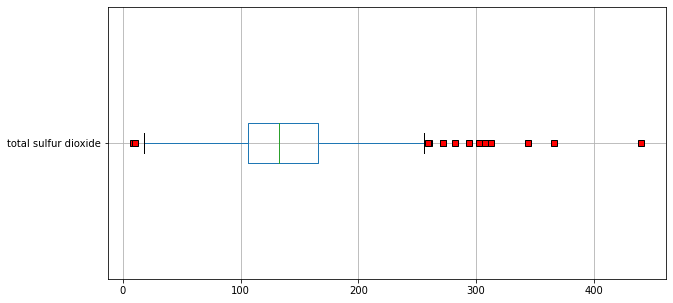

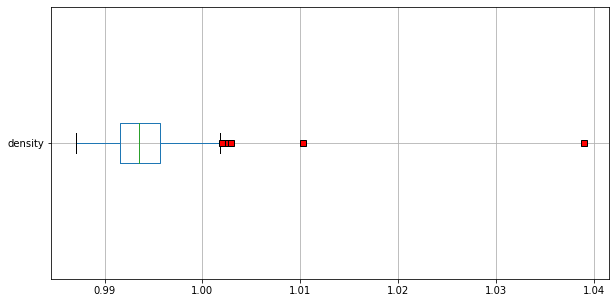

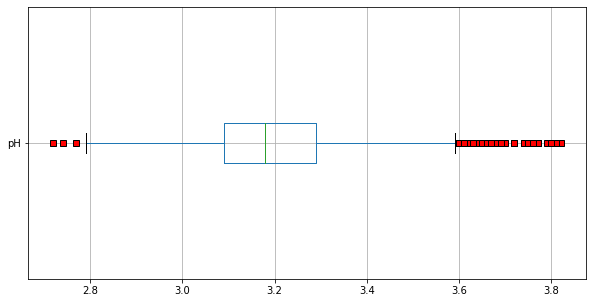

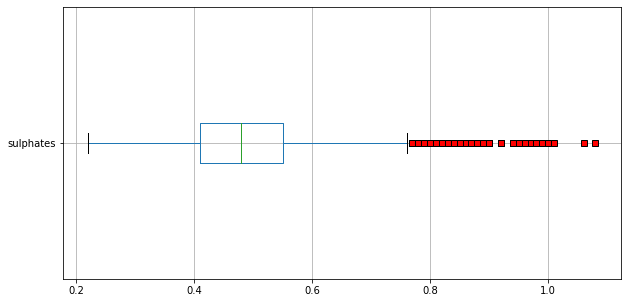

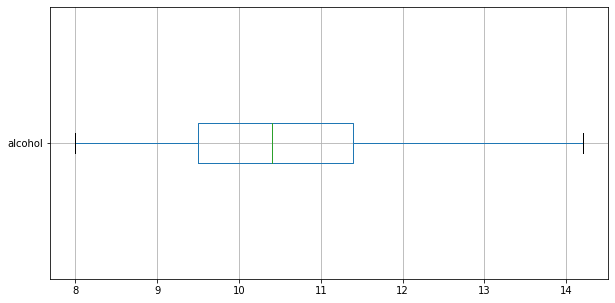

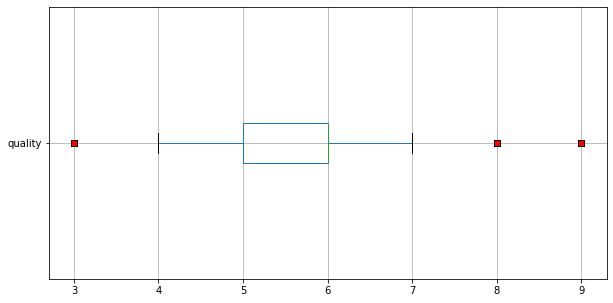

In [17]:
# Visualizamos la distribución, variabilidad y outliers con boxplot. 

for column in df_white:
    fig = plt.figure(figsize = (10,5))
    red_square = dict(markerfacecolor = 'r', marker = 's')
    df_white.boxplot([column], vert = False, flierprops = red_square)

In [18]:
# Vemos que también tenemos muchos outliers, que eliminamos usando la función antes creada. 
# Hemos eliminado 359 registros considerados outliers en alguna de las variables. 

df_white_cleaned = clean_outliers(df_white)
estadisticas(df_white_cleaned)

print('número de registros con outliers: ', df_white.shape)
print('número de resgistros sin outliers: ', df_white_cleaned.shape)

Column                  Mean                    Std                     Median     Min        Max        

fixed acidity           6.826901721265953       0.8096557363057317      6.8        4.4        9.4       
volatile acidity        0.2725083287062744      0.0869290189302074      0.26       0.08       0.585     
citric acid             0.3262104386451943      0.10099666133357754     0.32       0.0        0.69      
residual sugar          5.8887978900610864      4.675664945348618       4.8        0.6        19.95     
chlorides               0.042891171571349584    0.011729731367791693    0.042      0.012      0.108     
free sulfur dioxide     34.3964464186563        15.4951943577677        33.0       2.0        86.0      
total sulfur dioxide    136.21779566907273      41.6737100419869        132.0      21.0       260.0     
density                 0.9937048722931664      0.002780394633607502    0.9934     0.98711    1.00182   
pH                      3.195433092726258       0.143

Una vez eliminados los outliers, vamos a analizar si hay **correlación entre variables**

<AxesSubplot:>

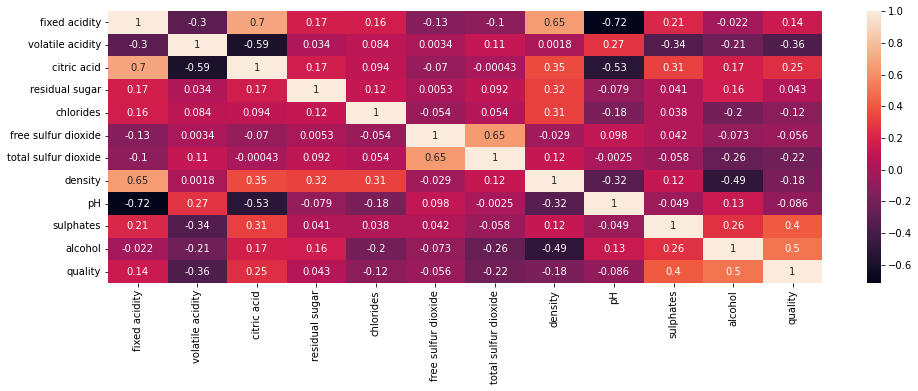

In [19]:
# Usamos la función heatmap de Seaborn en el dataset de vino rosado:

plt.figure(figsize = (16, 5))
sns.heatmap(df_red_cleaned.corr(), annot = True)

<AxesSubplot:>

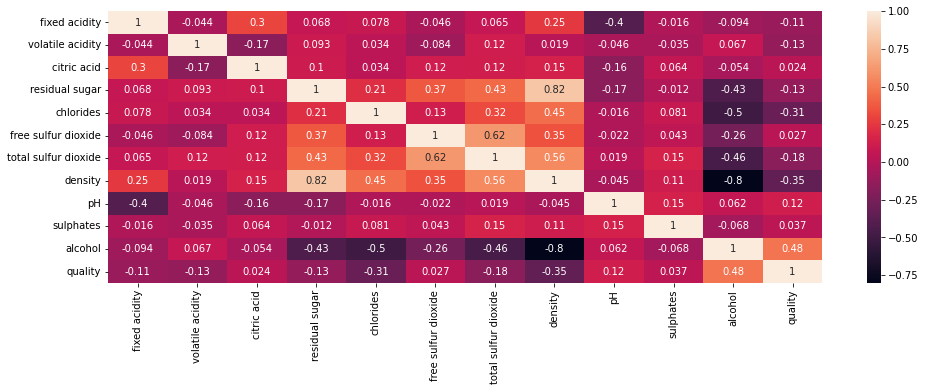

In [20]:
# Y ahora en el de vino blanco:

plt.figure(figsize = (16, 5))
sns.heatmap(df_white_cleaned.corr(), annot = True)

* Vemos que hay una correlación negativa relativamente alta entre la densidad y el acohol, y una correlación positiva entre la densidad y el azúcar residual en el vino blanco.
* En cambio, en el vino rosado hay una correlación negativa relativamente alta entre la acidez y el pH.
* No obstante, ninguna de ellas supera el valor de 0.85, por lo que decidimos no eliminar variables por el momento. 

**Definir la variable objetivo**

Para construir nuestro modelo de clasificación de vino rosado .vs vino blanco, tendremos que juntar ambos datasets ya limpios. No obstante, no tenemos una variable objetivo, por lo que tenemos que crearla. 

Para establecer nuestra variable objetivo, vamos a crear una nueva columna llaman *target* en cada uno de los datasets, y vamos a darle el valor 0 para el vino rosado, y el valor 1 para el vino rosado. 

Así, el vino rosado será nuestra clase negativa y el blanco nuestra clase positiva. 

In [21]:
# Usamos la función insert de pandas, especificando la posición de la columna, el nombre y el valor
df_red_cleaned.insert(12, 'target', 0)
df_red_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [22]:
df_white_cleaned.insert(12, 'target', 1)
df_white_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [23]:
# Y ahora ya podemos combinar ambos datasets sobre los que aplicaremos el modelo. 

df_cleaned = pd.concat([df_red_cleaned, df_white_cleaned], axis = 0)
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


<AxesSubplot:>

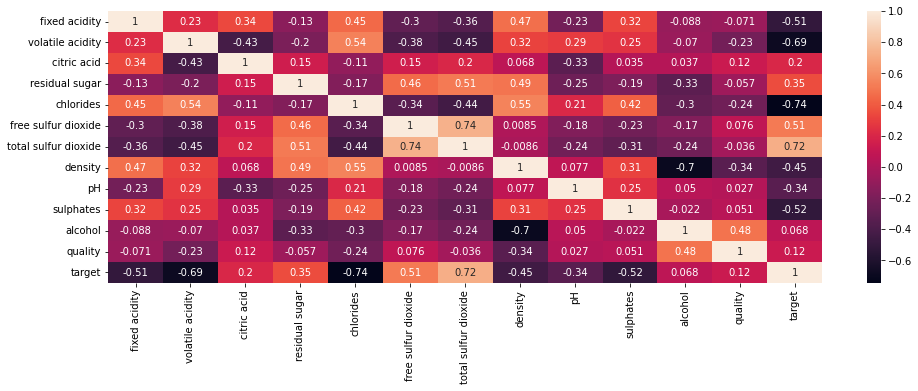

In [24]:
# Comprovamos que despues del merge no haya alguna variable que esta demasiado correlacionada con el objetivo

plt.figure(figsize = (16, 5))
sns.heatmap(df_cleaned.corr(), annot = True)

Vemos que el total sulfur dioxide y los chlorides tiene una correlación relativamente alta con el target, pero no consideramos que se lo suficiente como para haberla de descartar.

In [25]:
# guardamos los datos limpios usando la libreria Pickle y verificamos que se han guardado bien subiéndolos de nuevo

with open('data/winequality/df_cleaned.pkl', 'wb') as f:
    pickle.dump(df_cleaned, f)

with open('data/winequality/df_cleaned.pkl', 'rb') as f:
    df = pickle.load(f)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Datos de entrenamiento y de testeo

In [26]:
# Comprobamos el desbalanceo de nuestros datos antes de seguir:
# Primero contamos el número de registros para cada clase con .value_counts(),
# Y luego separamos las clases

class_0, class_1 = df['target'].value_counts()

class_0 = df[df['target'] == 0]
class_1 = df[df['target'] == 1]

print('class 0: ', class_0.shape)
print('class 1: ', class_1.shape)

class 0:  (1208, 13)
class 1:  (3602, 13)


In [27]:
# extraemos nuestra variable objetivo de las variables predictoras

y = df.pop('target')

In [28]:
# Dividimos los datos en entrenamiento y testeo, estableciendo un 25% para test y un 75% para train
# Usamos la función train_test_split de scikit learn

X_train, X_test, y_train, y_test = train_test_split (df, y, test_size = 0.25)


In [29]:
# Miramos la distribución de las clases antes de balancearlas

print("Antes de balancear: ", Counter(y_train))

Antes de balancear:  Counter({1: 2715, 0: 892})


#### Primer test: sin normalizar y con Random UnderSample

In [30]:
# definimos una primera estrategia de balanceo: undersample de la clase mayoritaria
# vamos a usar la función RandomUnderSample del paquete imblearn (imbalanced-learn)

undersample = RandomUnderSampler(sampling_strategy = 'majority')

In [31]:
# Aplicamos la transformación a nuestros dos grupos de datos:

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [32]:
# Miramos de nuevo la distribución de clases:
# Comprobamos que tenemos mismos registros de ambas clases

print("Antes de balancear: ", Counter(y_train))
print ('Después de balancear: ', Counter(y_train_under))

Antes de balancear:  Counter({1: 2715, 0: 892})
Después de balancear:  Counter({0: 892, 1: 892})


In [33]:
# Aplicamos el modelo de regresión logística.
# Primero vamos a aplicarla sin normalizar los datos

lr_under = LogisticRegression(max_iter = 1000)
lr_under.fit(X_train_under, y_train_under)

LogisticRegression(max_iter=1000)

In [34]:
lr_under.score(X_train_under, y_train_under)

0.984304932735426

In [35]:
# Evaluación del modelo: lo aplicamos a X test

predictions_under = lr_under.predict(X_test)
predictions_under

array([1, 1, 1, ..., 1, 1, 0])

In [36]:
# Extraemos las probabilidad que predice el modelo a partir de las cuales clasifica. 

probability_under = lr_under.predict_proba(X_test)
probability_under

array([[2.66657539e-03, 9.97333425e-01],
       [1.39094241e-01, 8.60905759e-01],
       [7.91513771e-04, 9.99208486e-01],
       ...,
       [1.86936388e-02, 9.81306361e-01],
       [1.16913520e-02, 9.88308648e-01],
       [9.47221700e-01, 5.27783001e-02]])

In [37]:
# Obtenemos el ROC, AUC y la Matríz de Confusión

print('ROC-AUC: ', metrics.roc_auc_score(y_test, predictions_under))
print('AUC: ', metrics.accuracy_score(y_test, predictions_under))
print('Precision: ', metrics.precision_score(y_test, predictions_under))
print('Recall: ', metrics.recall_score(y_test, predictions_under))
print('F-1 Score: ', metrics.f1_score(y_test, predictions_under))

ROC-AUC:  0.9841968375836628
AUC:  0.9842061512884456
Precision:  0.9943052391799544
Recall:  0.9842164599774521
F-1 Score:  0.9892351274787535


Confusion Matrix for Logistic Regression  



/home/m315/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


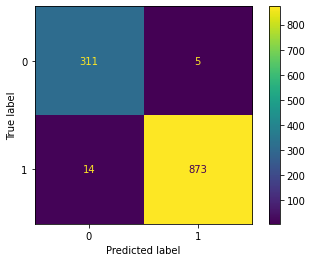

In [38]:
# "Pintamos" la matriz de confusión

print('\033[1m' + 'Confusion Matrix for Logistic Regression','\033[0m', '\n')
metrics.plot_confusion_matrix(lr_under, X_test, y_test)

#### Segundo test: sin normalizar y con SMOTE

Probamos el modelo añadiendo datos artificiales de la clase minoritaria, utilizando el algoritmo SMOTE.

In [39]:
# A partir del mismo split realizado anteriormente,
# Primero definimos el método de balanceado (SMOTE)
# luego lo aplicamos a los datos splitados, y vemos cómo queda la distribución de clases antes y después
# Vemos que hemos "creado" unos 1.600 registros artificiales de la clase minoritaria

SMOTE = SMOTE()

X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)

print('Antes de balancear: ', Counter(y_train))
print('Después de balancear: ', Counter(y_train_smote))

Antes de balancear:  Counter({1: 2715, 0: 892})
Después de balancear:  Counter({0: 2715, 1: 2715})


In [58]:
# Aplicamos el modelo de regresión logística

lr_smote = LogisticRegression(max_iter = 1000)
lr_smote.fit(X_train_smote, y_train_smote)
lr_smote.score(X_train_smote, y_train_smote)

/home/m315/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9913443830570903

In [41]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_smote = lr_smote.predict(X_test)
probability_smote = lr_smote.predict_proba(X_test)
probability_smote

array([[8.80188480e-04, 9.99119812e-01],
       [8.35728829e-02, 9.16427117e-01],
       [1.38899552e-04, 9.99861100e-01],
       ...,
       [1.06980614e-02, 9.89301939e-01],
       [2.38975253e-03, 9.97610247e-01],
       [9.16906135e-01, 8.30938651e-02]])

In [42]:
# Vemos el rendimiento del modelo. 
# Comparado a la versión con undersampling, obtenemos un rendimiento muy similar

print('ROC-AUC smote: ', metrics.roc_auc_score(y_test, predictions_smote), '/', 'ROC-AUC undersampling: ', metrics.roc_auc_score(y_test, predictions_smote))
print('AUC smote: ', metrics.accuracy_score(y_test, predictions_smote), '/', 'AUC undersmapling: ', metrics.accuracy_score(y_test, predictions_smote))
print('Precision smote: ', metrics.precision_score(y_test, predictions_smote), '/', 'Precision undersampling: ', metrics.precision_score(y_test, predictions_smote))
print('Recall smote: ', metrics.recall_score(y_test, predictions_smote), '/', 'Recall undersampling: ', metrics.recall_score(y_test, predictions_smote))
print('F-1 Score smote: ', metrics.f1_score(y_test, predictions_smote), '/', 'F-1 Score: ', metrics.f1_score(y_test, predictions_smote))

ROC-AUC smote:  0.9859967462503391 / ROC-AUC undersampling:  0.9859967462503391
AUC smote:  0.9883624272651704 / AUC undersmapling:  0.9883624272651704
Precision smote:  0.9932203389830508 / Precision undersampling:  0.9932203389830508
Recall smote:  0.9909808342728298 / Recall undersampling:  0.9909808342728298
F-1 Score smote:  0.9920993227990971 / F-1 Score:  0.9920993227990971


Confusion Matrix for Logistic Regression  



/home/m315/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


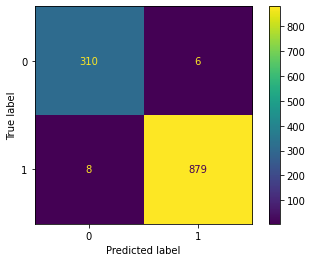

In [43]:
print('\033[1m' + 'Confusion Matrix for Logistic Regression','\033[0m', '\n')
metrics.plot_confusion_matrix(lr_smote, X_test, y_test)

#### Tercer test: con normalización y undersampling

Vamos a probar ambos procedimientos, normalizando los datos previamente. 

In [44]:
# Normalizamos con el módulo StandardScaler de Scikit Learn, y luego aplicamos el undersampling
# Para mantener esta versión de los datos separa de la anterior, la atribuimos a un nuevo dataframe
# y lo visualizamos

modelo_normalizacion = StandardScaler().fit(X_train)
features = modelo_normalizacion.transform(X_train)
df_normalized = pd.DataFrame(features, columns = df.columns)
df_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.573200,-0.986784,0.689005,-0.738781,0.410076,-1.373232,-1.670208,-0.114120,0.363221,1.370640,0.450867,-0.992001
1,-0.874681,-0.733685,1.378988,-0.808160,-0.070307,-0.698849,-0.467386,-0.565961,0.495907,-0.495217,-0.832562,-0.992001
2,0.894952,-0.860235,0.305681,-0.946919,-0.113979,-1.066694,-0.700769,-0.844018,-0.631921,-1.117169,-0.062504,0.192816
3,-0.633367,0.341985,-0.767626,-0.877539,-0.507020,0.343378,0.412289,-0.757125,-0.499236,-0.495217,-0.319190,-0.992001
4,0.331887,-0.164213,1.378988,1.943889,0.410076,1.262991,1.399680,1.554218,-0.034836,0.048991,-1.345933,-2.176817
...,...,...,...,...,...,...,...,...,...,...,...,...
3602,-2.000810,-0.006026,-1.304279,-0.854413,-0.725377,2.427833,0.986771,-0.802309,1.623735,-0.495217,-0.062504,-0.992001
3603,0.010136,-0.986784,-0.000978,-0.900666,-0.332335,-0.576234,-0.718722,-0.670233,0.628592,-0.961681,0.194182,1.377633
3604,0.010136,2.050403,-2.147592,-0.623148,1.108817,-0.821464,-0.485339,1.043289,2.021792,0.359968,-0.747000,-0.992001
3605,-1.035556,-0.986784,-0.230972,-0.923792,-0.681705,-0.331004,-0.449434,-1.212442,0.429564,0.204480,0.065839,1.377633


In [45]:
# Balanceamos los datos con undersampling y aplicamos el modelo

X_train_under_norma, y_train_under_norma = undersample.fit_resample(X_train, y_train)
lr_normalized = LogisticRegression(max_iter = 1000)
lr_normalized.fit(X_train_under_norma, y_train_under_norma)
lr_normalized.score(X_train_under, y_train_under)

0.9854260089686099

In [46]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_under_norma = lr_normalized.predict(X_test)
probability_under_norma = lr_normalized.predict_proba(X_test)
probability_under_norma

array([[4.10175652e-03, 9.95898243e-01],
       [1.44092676e-01, 8.55907324e-01],
       [6.12631621e-04, 9.99387368e-01],
       ...,
       [3.23092103e-02, 9.67690790e-01],
       [6.99108206e-03, 9.93008918e-01],
       [9.31124061e-01, 6.88759391e-02]])

In [47]:
# Vemos las métricas del modelo.
# Seguimos con rendimientos muy similares 

print('ROC-AUC under normalized: ', metrics.roc_auc_score(y_test, predictions_under_norma))
print('AUC under normalized: ', metrics.accuracy_score(y_test, predictions_under_norma))
print('Precision under normalized: ', metrics.precision_score(y_test, predictions_under_norma))
print('Recall under normalized: ', metrics.recall_score(y_test, predictions_under_norma))
print('F-1 Score under normalized: ', metrics.f1_score(y_test, predictions_under_norma))

ROC-AUC under normalized:  0.9864516290154552
AUC under normalized:  0.9875311720698254
Precision under normalized:  0.9943310657596371
Recall under normalized:  0.9887260428410372
F-1 Score under normalized:  0.9915206331260599


Confusion Matrix for Logistic Regression  



/home/m315/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


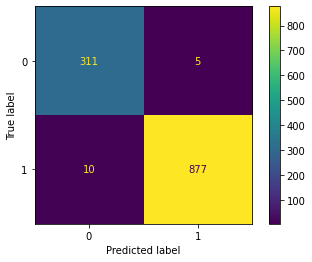

In [48]:
print('\033[1m' + 'Confusion Matrix for Logistic Regression','\033[0m', '\n')
metrics.plot_confusion_matrix(lr_normalized, X_test, y_test)

## Otros modelos

### KNN

In [49]:
# Generamos el modelo knn fijando k

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_knn = knn.predict(X_test)
probability_knn = knn.predict_proba(X_test)
probability_knn

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [51]:
print('ROC-AUC under normalized: ', metrics.roc_auc_score(y_test, predictions_knn))
print('AUC under normalized: ', metrics.accuracy_score(y_test, predictions_knn))
print('Precision under normalized: ', metrics.precision_score(y_test, predictions_knn))
print('Recall under normalized: ', metrics.recall_score(y_test, predictions_knn))
print('F-1 Score under normalized: ', metrics.f1_score(y_test, predictions_knn))

ROC-AUC under normalized:  0.9308542519943487
AUC under normalized:  0.9551122194513716
Precision under normalized:  0.9581958195819582
Recall under normalized:  0.9819616685456595
F-1 Score under normalized:  0.9699331848552338


Con el modelo knn obtenemos peores resultados que con la regresion logistica, aunque siguen siendo buenos.

### Decision Tree

In [52]:
# Generamos el modelo de Decision Tree

dt = DecisionTreeClassifier(max_leaf_nodes=4)

In [53]:
# Aplicamos cross validation para evaluar el modelo

cross_val_score(dt, df, y, cv=10)

array([0.97505198, 0.96257796, 0.97089397, 0.98128898, 0.98128898,
       0.97297297, 0.97920998, 0.96673597, 0.96673597, 0.96465696])

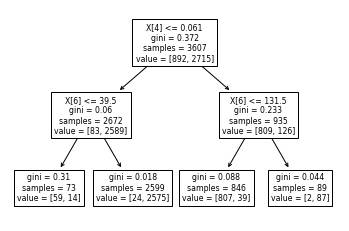

X[4] =  chlorides 	 X[6] =  total sulfur dioxide


In [54]:
dt.fit(X_train, y_train)
tree.plot_tree(dt)
plt.show()
print('X[4] = ', X_train.columns[4], '\t X[6] = ', X_train.columns[6])

In [55]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_dt = dt.predict(X_test)
probability_st = dt.predict_proba(X_test)
probability_st

array([[0.00923432, 0.99076568],
       [0.00923432, 0.99076568],
       [0.00923432, 0.99076568],
       ...,
       [0.00923432, 0.99076568],
       [0.00923432, 0.99076568],
       [0.80821918, 0.19178082]])

In [56]:
print('ROC-AUC under normalized: ', metrics.roc_auc_score(y_test, predictions_dt))
print('AUC under normalized: ', metrics.accuracy_score(y_test, predictions_dt))
print('Precision under normalized: ', metrics.precision_score(y_test, predictions_dt))
print('Recall under normalized: ', metrics.recall_score(y_test, predictions_dt))
print('F-1 Score under normalized: ', metrics.f1_score(y_test, predictions_dt))

ROC-AUC under normalized:  0.959790147417693
AUC under normalized:  0.969243557772236
Precision under normalized:  0.9786036036036037
Recall under normalized:  0.979706877113867
F-1 Score under normalized:  0.9791549295774647


Vemos que los resultados son un poco peores que con la regresion logistica, aunque si no limitamos el numero de hojas son mejores aun.

Gracias al grafico podemos ver que las dos variables más determinantes para saber si un vino es blanco o rosado son chlorides y el total sulfur dioxide. 

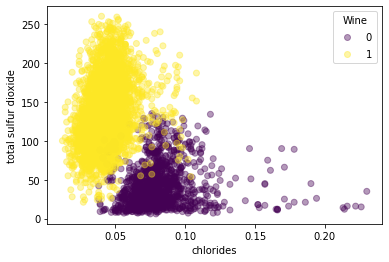

In [57]:
# Podemos ver cómo se distribuyen estas dos variables en función del tipo de vino
# Usamos un diagrama de dispersión de MatPlotLib.
# Recordar que nuestra clase negativa es el vino rosado, y la positiva el blanco.

scatter = plt.scatter(x = df_cleaned['chlorides'], y = df_cleaned['total sulfur dioxide'], c = df_cleaned['target'], alpha = 0.4)
plt.legend(*scatter.legend_elements(), loc="upper right", title="Wine")
plt.xlabel("chlorides")
plt.ylabel("total sulfur dioxide")
plt.show()

## Conclusiones

* Todos los modelos han dado muy buenos resultados, siendo el mejor la regresión logística. 
* Como podemos ver en los datos de ROC, AUC, Precision, Recall y F-1 Score, obtenemos unos aciertos en la clasificación notablemente altos, tanto si usamos una muestra *oversampled* o *undersampled*. 
* Así, atendiendo a la recall y la precision de la regresión logística, estaremos acertando en aproximadamente el 98-99% de los casos. Son resultados tal vez demasiado elevados, pero hemos comprobado los datos varias veces y no parece que hayan variables contaminadores que puedan estar enturbiando el modelo. 
* Viendo los resultados del decision tree, y el hecho de que considere como más relevantes únicamente dos variables, podríamos pensar que, realmente, el vino blanco y el rosado pudieran tener diferencias notables en esas dos variables, lo que hace que los modelos obtengan muy buenos resultados en la clasificación. 
* De hecho, viendo cómo se distribuyen estas dos variables en el vino rosado y el vino blanco, en el diagrama de dispersión, vemos que éstos se diferencias claramente por sus niveles de *chlorides* y por el *total sulfure dioxide*. 
* Por tanto, podemos concluir que este es el motivo por el que obtenemos tan buenos resultados. 